In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [3]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [4]:
bb100.apply(pd.Series.nunique)

url                        3279
WeekID                     3279
Week Position               100
Song                      24360
Performer                 10061
SongID                    29389
Instance                     10
Previous Week Position      100
Peak Position               100
Weeks on Chart               87
dtype: int64

In [5]:
#Number of Weeks in the Billboard Top 100 Dataset from 1958 to 2021
bb100.apply(pd.Series.nunique)[0]

3279

In [6]:
#Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [7]:
#First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.to_datetime(bb100['WeekID'])

In [8]:
#Billboard Top #1 By Week from 1958 to 2021
bb1 = bb100[bb100['Week Position']==1].copy()
bb1.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
944,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
22342,http://www.billboard.com/charts/hot-100/1958-08-09,1958-08-09,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,1.0,1,2
232960,https://www.billboard.com/charts/hot-100/2021-05-22,2021-05-22,1,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),Leave The Door OpenSilk Sonic (Bruno Mars & Anderson .Paak),1,2.0,1,10
3522,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,1,Good 4 U,Olivia Rodrigo,Good 4 UOlivia Rodrigo,1,NaN,1,1


In [9]:
bb1_counter = bb1['SongID'].value_counts().rename('Count').to_frame().reset_index()
bb1_counter = bb1_counter.rename(columns = {'index':'SongID'})
bb1_counter.iloc[np.r_[0:15, -5:0]]

,SongID,Count
0,Old Town RoadLil Nas X Featuring Billy Ray Cyrus,19
1,One Sweet DayMariah Carey & Boyz II Men,16
2,DespacitoLuis Fonsi & Daddy Yankee Featuring Justin Bieber,16
3,I Gotta FeelingThe Black Eyed Peas,14
4,We Belong TogetherMariah Carey,14
5,Candle In The Wind 1997/Something About The Way You Look TonightElton John,14
6,Macarena (Bayside Boys Mix)Los Del Rio,14
7,I'll Make Love To YouBoyz II Men,14
8,I Will Always Love YouWhitney Houston,14
9,Uptown Funk!Mark Ronson Featuring Bruno Mars,14


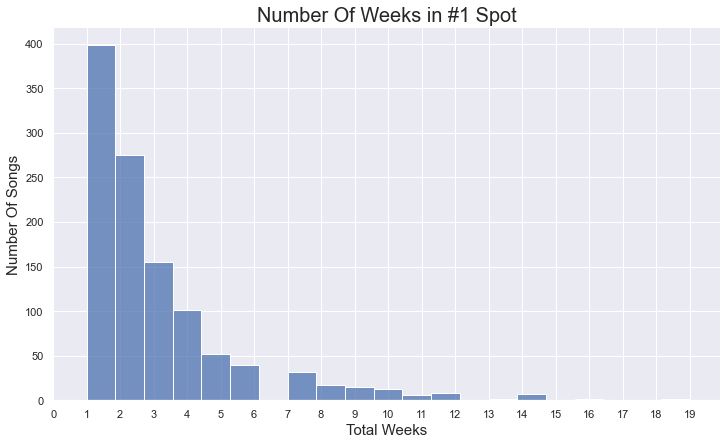

In [18]:
sns.displot(x=bb1_counter['Count'], bins=21, height=6, aspect=1.7)
plt.xlabel('Total Weeks', fontsize=15)
plt.ylabel('Number Of Songs', fontsize=15)
plt.title('Number Of Weeks in #1 Spot', fontsize=20)
plt.xticks(np.arange(0,20,1));

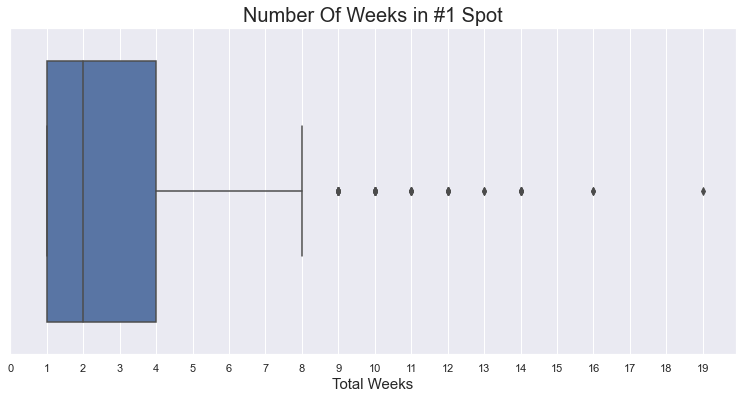

In [51]:
sns.boxplot(x=bb1_counter['Count'], width=0.8)
plt.xlabel('Total Weeks', fontsize=15)
plt.title('Number Of Weeks in #1 Spot', fontsize=20)
plt.xticks(np.arange(0,20,1))
sns.set(rc={'figure.figsize':(14,6)});

In [52]:
#Cross check values of boxplot via describe()
bb1_counter.describe()

,Count
count,1124.000000
mean,2.917260
std,2.552268
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,19.000000


In [53]:
#Cross check shape of dataframe vs 'count', total count vs url weeks
print(bb1_counter.shape)
print(bb1_counter.Count.sum())

(1124, 2)
3279


In [54]:
#Any song which has been ranked #1 for more than 8 weeks is an OUTLIER
#Which ones are they? 

Outliers = bb1_counter[bb1_counter['Count']>8].copy()
Outliers.describe()

,Count
count,54.000000
mean,11.148148
std,2.235287
min,9.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,19.000000


In [55]:
Outliers

,SongID,Count
0,Old Town RoadLil Nas X Featuring Billy Ray Cyrus,19
1,One Sweet DayMariah Carey & Boyz II Men,16
2,DespacitoLuis Fonsi & Daddy Yankee Featuring Justin Bieber,16
3,I Gotta FeelingThe Black Eyed Peas,14
4,We Belong TogetherMariah Carey,14
5,Candle In The Wind 1997/Something About The Way You Look TonightElton John,14
6,Macarena (Bayside Boys Mix)Los Del Rio,14
7,I'll Make Love To YouBoyz II Men,14
8,I Will Always Love YouWhitney Houston,14
9,Uptown Funk!Mark Ronson Featuring Bruno Mars,14


In [57]:
outlier_features = pd.merge(Outliers, features, on='SongID', how='left')
outlier_features

,SongID,Count,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,Old Town RoadLil Nas X Featuring Billy Ray Cyrus,19,Lil Nas X Featuring Billy Ray Cyrus,Old Town Road,"['country rap', 'lgbtq+ hip hop', 'pop rap']",2YpeDb67231RjR0MgVLzsG,https://p.scdn.co/mp3-preview/d94ec2ebe62fd52cf038760f57c251c145346bb2?cid=b8d3901151d34489a160e3cf0ab1fa94,157066.0,0.0,7 EP,0.878,0.619,6.0,-5.560,1.0,0.1020,0.053300,0.000000,0.1130,0.6390,136.041,4.0,91.0
1,Old Town RoadLil Nas X Featuring Billy Ray Cyrus,19,Lil Nas X Featuring Billy Ray Cyrus,Old Town Road,"['country rap', 'lgbtq+ hip hop', 'pop rap']",2YpeDb67231RjR0MgVLzsG,https://p.scdn.co/mp3-preview/d94ec2ebe62fd52cf038760f57c251c145346bb2?cid=b8d3901151d34489a160e3cf0ab1fa94,157066.0,0.0,7 EP,0.878,0.619,6.0,-5.560,1.0,0.1020,0.053300,0.000000,0.1130,0.6390,136.041,4.0,91.0
2,One Sweet DayMariah Carey & Boyz II Men,16,Mariah Carey & Boyz II Men,One Sweet Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DespacitoLuis Fonsi & Daddy Yankee Featuring Justin Bieber,16,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,Despacito,"['latin', 'latin pop', 'puerto rican pop', 'tropical']",6rPO02ozF3bM7NnOV4h6s2,NaN,228826.0,0.0,Despacito Feat. Justin Bieber (Remix),0.653,0.816,2.0,-4.353,1.0,0.1670,0.228000,0.000000,0.0967,0.8160,178.086,4.0,76.0
4,I Gotta FeelingThe Black Eyed Peas,14,The Black Eyed Peas,I Gotta Feeling,"['dance pop', 'pop', 'pop rap']",4vp2J1l5RD4gMZwGFLfRAu,NaN,289133.0,0.0,THE E.N.D. (THE ENERGY NEVER DIES),0.741,0.748,0.0,-6.299,1.0,0.0264,0.082300,0.000000,0.3400,0.6000,127.965,4.0,70.0
5,We Belong TogetherMariah Carey,14,Mariah Carey,We Belong Together,"['dance pop', 'pop', 'r&b', 'urban contemporary']",3LmvfNUQtglbTrydsdIqFU,NaN,201400.0,0.0,The Emancipation of Mimi,0.838,0.469,0.0,-7.992,1.0,0.0835,0.035800,0.000000,0.0928,0.7780,139.975,4.0,72.0
6,Candle In The Wind 1997/Something About The Way You Look TonightElton John,14,Elton John,Candle In The Wind 1997/Something About The Way You Look Tonight,"['glam rock', 'mellow gold', 'piano rock', 'soft rock']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Macarena (Bayside Boys Mix)Los Del Rio,14,Los Del Rio,Macarena (Bayside Boys Mix),"['deep norteno', 'duranguense', 'norteno', 'norteno-sax']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,I'll Make Love To YouBoyz II Men,14,Boyz II Men,I'll Make Love To You,"['boy band', 'new jack swing', 'pop', 'quiet storm', 'r&b', 'urban contemporary']",61sQYdFNS6sEBYCyr1q5gn,NaN,236773.0,0.0,II,0.557,0.509,2.0,-7.928,1.0,0.0243,0.119000,0.000000,0.0794,0.2440,142.408,3.0,65.0
9,I Will Always Love YouWhitney Houston,14,Whitney Houston,I Will Always Love You,"['dance pop', 'pop', 'r&b']",4eHbdreAnSOrDDsFfc4Fpm,https://p.scdn.co/mp3-preview/91e6d3e0b48cda2f3a1b2391a1c1384fbf73b8a8?cid=b8d3901151d34489a160e3cf0ab1fa94,271093.0,0.0,The Bodyguard - Original Soundtrack Album,0.306,0.214,4.0,-12.518,1.0,0.0356,0.844000,0.000005,0.0839,0.1080,66.980,4.0,78.0


In [58]:
#Sum the Null Values by Column: 
outlier_features.isnull().sum()

SongID                        0
Count                         0
Performer                     0
Song                          0
spotify_genre                 1
spotify_track_id              6
spotify_track_preview_url    29
spotify_track_duration_ms     6
spotify_track_explicit        6
spotify_track_album           6
danceability                  6
energy                        6
key                           6
loudness                      6
mode                          6
speechiness                   6
acousticness                  6
instrumentalness              6
liveness                      6
valence                       6
tempo                         6
time_signature                6
spotify_track_popularity      6
dtype: int64

In [65]:
outlier_comp_features = outlier_features[['SongID','danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
outlier_comp_features = outlier_comp_features.iloc[1: , :]
outlier_comp_features

,SongID,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1,Old Town RoadLil Nas X Featuring Billy Ray Cyrus,0.878,0.619,0.1020,0.053300,0.000000,0.1130,0.6390,136.041
2,One Sweet DayMariah Carey & Boyz II Men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DespacitoLuis Fonsi & Daddy Yankee Featuring Justin Bieber,0.653,0.816,0.1670,0.228000,0.000000,0.0967,0.8160,178.086
4,I Gotta FeelingThe Black Eyed Peas,0.741,0.748,0.0264,0.082300,0.000000,0.3400,0.6000,127.965
5,We Belong TogetherMariah Carey,0.838,0.469,0.0835,0.035800,0.000000,0.0928,0.7780,139.975
6,Candle In The Wind 1997/Something About The Way You Look TonightElton John,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Macarena (Bayside Boys Mix)Los Del Rio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,I'll Make Love To YouBoyz II Men,0.557,0.509,0.0243,0.119000,0.000000,0.0794,0.2440,142.408
9,I Will Always Love YouWhitney Houston,0.306,0.214,0.0356,0.844000,0.000005,0.0839,0.1080,66.980
10,Uptown Funk!Mark Ronson Featuring Bruno Mars,0.856,0.609,0.0824,0.008010,0.000082,0.0344,0.9280,114.988


In [66]:
outlier_comp_features[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].mean()

danceability          0.685562
energy                0.595563
speechiness           0.098427
acousticness          0.216034
instrumentalness      0.066373
liveness              0.180783
valence               0.578529
tempo               112.672500
dtype: float64

In [105]:
#Billboard Bottom '99' By Week from 1958 to 2021

bb99 = bb100[bb100['Week Position']!=1].copy()
bb99.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
8543,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,58,Fool's Paradise,The Crickets,Fool's ParadiseThe Crickets,1,NaN,58,1
131373,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,25,What Am I Living For,Chuck Willis,What Am I Living ForChuck Willis,1,NaN,25,1
290099,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,68,Streets,Doja Cat,StreetsDoja Cat,1,58.0,16,19
100794,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,26,Beautiful Mistakes,Maroon 5 Featuring Megan Thee Stallion,Beautiful MistakesMaroon 5 Featuring Megan Thee Stallion,1,18.0,18,11


In [106]:
bb99 = bb99[bb99['Peak Position']!=1].copy()
print(bb99['Peak Position'].min())
bb99.sort_values(by='Peak Position')

2


,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
82475,https://www.billboard.com/charts/hot-100/2021-02-27,2021-02-27,13,Therefore I Am,Billie Eilish,Therefore I AmBillie Eilish,1,15.0,2,15
104780,http://www.billboard.com/charts/hot-100/2005-07-16,2005-07-16,5,Inside Your Heaven,Bo Bice,Inside Your HeavenBo Bice,1,2.0,2,2
256594,http://www.billboard.com/charts/hot-100/1982-07-10,1982-07-10,85,Don't Talk To Strangers,Rick Springfield,Don't Talk To StrangersRick Springfield,1,68.0,2,19
256725,http://www.billboard.com/charts/hot-100/1991-10-12,1991-10-12,91,It Ain't Over 'til It's Over,Lenny Kravitz,It Ain't Over 'til It's OverLenny Kravitz,1,71.0,2,19
319659,http://www.billboard.com/charts/hot-100/1994-01-08,1994-01-08,15,Just Kickin' It,Xscape,Just Kickin' ItXscape,1,15.0,2,17
...,...,...,...,...,...,...,...,...,...,...
104324,http://www.billboard.com/charts/hot-100/1961-11-04,1961-11-04,100,Losing Your Love,Jim Reeves,Losing Your LoveJim Reeves,1,NaN,100,1
22286,http://www.billboard.com/charts/hot-100/2014-07-12,2014-07-12,100,She Twerkin,Ca$h Out,She TwerkinCa$h Out,1,NaN,100,1
22285,http://www.billboard.com/charts/hot-100/2014-03-15,2014-03-15,100,Sleeping With A Friend,Neon Trees,Sleeping With A FriendNeon Trees,1,NaN,100,1
104311,http://www.billboard.com/charts/hot-100/1961-02-18,1961-02-18,100,Dream Boy,Annette With The Afterbeats,Dream BoyAnnette With The Afterbeats,1,NaN,100,1


In [107]:
bb99 = bb99['SongID'].value_counts().to_frame().reset_index()
bb99 = bb99.rename(columns = {'index':'SongID', 'SongID':'Frequency'})
bb99

,SongID,Frequency
0,RadioactiveImagine Dragons,87
1,SailAWOLNATION,79
2,I'm YoursJason Mraz,76
3,How Do I LiveLeAnn Rimes,69
4,Counting StarsOneRepublic,68
...,...,...
29331,President CarterLil Wayne,1
29332,Fly / I Believe I Can FlyGlee Cast,1
29333,AdrenalinaWisin Featuring Jennifer Lopez & Ricky Martin,1
29334,Calm DownBusta Rhymes Featuring Eminem,1


In [108]:
features_99 = pd.merge(bb99, features, on='SongID', how='left')
features_99

,SongID,Frequency,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,RadioactiveImagine Dragons,87,Imagine Dragons,Radioactive,['modern rock'],4G8gkOterJn0Ywt6uhqbhp,NaN,186813.0,0.0,Night Visions,0.448,0.784,9.0,-3.686,1.0,0.0627,0.1060,0.000108,0.6680,0.236,136.245,4.0,74.0
1,SailAWOLNATION,79,AWOLNATION,Sail,"['indie pop', 'la indie', 'modern alternative rock', 'modern rock', 'pop rock', 'rock', 'stomp pop']",5xhQChGGhKLWqBqX4XhtYE,https://p.scdn.co/mp3-preview/9a7c9ece7575d0bce24d8a24c0f35f48853655cb?cid=b8d3901151d34489a160e3cf0ab1fa94,259102.0,0.0,Megalithic Symphony Deluxe,0.825,0.435,1.0,-9.582,1.0,0.0568,0.4520,0.609000,0.0953,0.243,119.038,4.0,74.0
2,I'm YoursJason Mraz,76,Jason Mraz,I'm Yours,"['acoustic pop', 'neo mellow', 'pop', 'pop rock']",1EzrEOXmMH3G43AXT1y7pA,https://p.scdn.co/mp3-preview/c58f1bc9160754337b858a4eb824a6ac2321041d?cid=b8d3901151d34489a160e3cf0ab1fa94,242186.0,0.0,We Sing. We Dance. We Steal Things.,0.686,0.457,11.0,-8.322,1.0,0.0468,0.5950,0.000000,0.1050,0.718,150.953,4.0,83.0
3,How Do I LiveLeAnn Rimes,69,LeAnn Rimes,How Do I Live,"['country', 'country dawn', 'dance pop', 'pop rock']",7BD50ATrF3Vab5FQy7vtK8,https://p.scdn.co/mp3-preview/dfd7958f815b8496b20d48d905697be6bc1dec28?cid=b8d3901151d34489a160e3cf0ab1fa94,266973.0,0.0,Greatest Hits,0.577,0.462,2.0,-7.989,1.0,0.0279,0.1280,0.000000,0.0822,0.258,128.303,4.0,68.0
4,Counting StarsOneRepublic,68,OneRepublic,Counting Stars,"['dance pop', 'neo mellow', 'piano rock', 'pop', 'pop rock']",6sy3LkhNFjJWlaeSMNwQ62,NaN,257839.0,0.0,Native,0.664,0.705,1.0,-4.972,0.0,0.0382,0.0654,0.000000,0.1150,0.477,122.017,4.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29447,President CarterLil Wayne,1,Lil Wayne,President Carter,"['hip hop', 'new orleans rap', 'pop rap', 'rap', 'trap']",0h6sfKXFb641F2E13rY4f2,NaN,255373.0,1.0,Tha Carter IV (Deluxe),0.676,0.618,2.0,-7.495,0.0,0.1960,0.6890,0.008210,0.1270,0.466,79.799,4.0,55.0
29448,Fly / I Believe I Can FlyGlee Cast,1,Glee Cast,Fly / I Believe I Can Fly,"['glee club', 'hollywood', 'post-teen pop']",0sEIXE4ArDnStAbONgJUAK,https://p.scdn.co/mp3-preview/d4ecbfdbdc487f138d05da2327167688b825511e?cid=b8d3901151d34489a160e3cf0ab1fa94,213026.0,0.0,Fly / I Believe I Can Fly (Glee Cast Version),0.526,0.849,10.0,-4.785,1.0,0.0394,0.0230,0.000000,0.1860,0.232,121.993,4.0,45.0
29449,AdrenalinaWisin Featuring Jennifer Lopez & Ricky Martin,1,Wisin Featuring Jennifer Lopez & Ricky Martin,Adrenalina,"['latin', 'latin hip hop', 'latin pop', 'reggaeton', 'reggaeton flow', 'tropical']",2eqDUxbd0JPEhNrJdPlHLs,https://p.scdn.co/mp3-preview/887e90341f351d2fc5e204e39729141780251ae0?cid=b8d3901151d34489a160e3cf0ab1fa94,235546.0,0.0,El Regreso del Sobreviviente (Deluxe Edition),0.685,0.944,5.0,-2.793,1.0,0.1450,0.0856,0.000000,0.0927,0.757,124.987,4.0,65.0
29450,Calm DownBusta Rhymes Featuring Eminem,1,Busta Rhymes Featuring Eminem,Calm Down,"['east coast hip hop', 'hardcore hip hop', 'hip hop', 'hip pop', 'pop rap', 'rap']",72DuDVv06ZtKDceAlq40f2,https://p.scdn.co/mp3-preview/d04b75ab5a4fb9b1f4bea4e71aaf0dfcdbf56ba4?cid=b8d3901151d34489a160e3cf0ab1fa94,355666.0,1.0,Calm Down (feat. Eminem) - Single,0.513,0.827,1.0,-3.958,0.0,0.3090,0.0287,0.000000,0.1810,0.378,115.029,5.0,56.0


In [109]:
features_99[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].mean()

danceability          0.599883
energy                0.618119
speechiness           0.073522
acousticness          0.294702
instrumentalness      0.032564
liveness              0.192134
valence               0.601897
tempo               120.280017
dtype: float64

In [110]:
outlier_comp_features[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].mean()

danceability          0.685562
energy                0.595563
speechiness           0.098427
acousticness          0.216034
instrumentalness      0.066373
liveness              0.180783
valence               0.578529
tempo               112.672500
dtype: float64

In [ ]:
#One option is to do Radar Plot between outliers vs rest. Is there a significant difference??
#Is this worth it? Is there much difference? Can it tell a story? Unclear. 

In [106]:
#extract the upper and lower quantiles
lq = bb1_counter['Count'].quantile(0.25)
uq = bb1_counter['Count'].quantile(0.75)
iqr = uq - lq
upper_bound = uq + 1.5*iqr

print(bb1_counter_lq)
print(bb1_counter_uq)
print(iqr)
print(upper_bound)

#extract values outside these bounds 
#Pokemon_IQR_outliers = pokemon[(pokemon.HP <= lower_bound) | (pokemon.HP >= upper_bound)]
#Pokemon_IQR_outliers

1.0
4.0
3.0
8.5


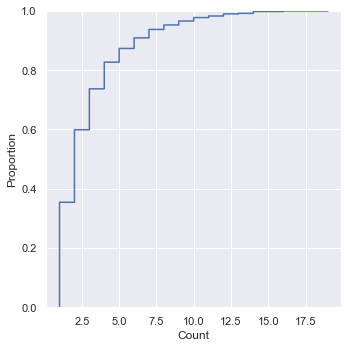

In [60]:
#ECDF to keep in mind for future use:
sns.displot(bb1_counter, x='Count', kind='ecdf');